In [1]:
import matplotlib.pyplot as plt
from collections import Counter
import scipy.stats as stats

In [2]:
def read_until_string(filename, stop_string="~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~"):
    with open(filename, 'r') as file:
        text = file.read()
    
    # Extract text until the stop_string
    if stop_string in text:
        text = text.split(stop_string)[0]
    return text

def plot_histogram(text, file_name):
    # Include spaces and only remove other non-alphabetical characters
    filtered_text = ''.join(c for c in text if c.isalpha() or c.isspace())
    
    # Count the occurrences of each character
    counter = Counter(filtered_text.lower())  # Case insensitive count
    
    # Get the 10 most common characters
    most_common = counter.most_common(10)
    
    # Get the count of spaces
    space_count = counter.get(' ', 0)
    
    # Plot the histogram for the top 10 characters
    characters, frequencies = zip(*most_common)
    plt.figure(figsize=(10, 6))
    plt.bar(characters, frequencies, color='skyblue')
    plt.xlabel('Character')
    plt.ylabel('Frequency')
    plt.title(f'Top 10 Most Frequent Characters in {file_name}')
    plt.show()
    
    return space_count

def process_files_from_array(file_paths, stop_string="~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~"):
    space_counts = []
    for file_path in file_paths:
        print(f"Processing {file_path}...")
        text = read_until_string(file_path, stop_string)
        space_count = plot_histogram(text, file_path)
        space_counts.append(space_count)

    return space_counts

def perform_anova(space_counts):
    # Perform one-way ANOVA to see if the space counts differ significantly between files
    f_statistic, p_value = stats.f_oneway(*space_counts)
    
    print(f"ANOVA Test Result: F-statistic = {f_statistic}, p-value = {p_value}")
    
    if p_value < 0.05:
        print("The difference in space counts is statistically significant.")
    else:
        print("The difference in space counts is not statistically significant.")


Processing examples\oscii_ex_catgirl\aiss.txt...


<>:1: SyntaxWarning: invalid escape sequence '\o'
<>:1: SyntaxWarning: invalid escape sequence '\o'
<>:2: SyntaxWarning: invalid escape sequence '\o'
<>:2: SyntaxWarning: invalid escape sequence '\o'
<>:2: SyntaxWarning: invalid escape sequence '\o'
<>:3: SyntaxWarning: invalid escape sequence '\o'
<>:3: SyntaxWarning: invalid escape sequence '\o'
<>:3: SyntaxWarning: invalid escape sequence '\o'
<>:1: SyntaxWarning: invalid escape sequence '\o'
<>:1: SyntaxWarning: invalid escape sequence '\o'
<>:2: SyntaxWarning: invalid escape sequence '\o'
<>:2: SyntaxWarning: invalid escape sequence '\o'
<>:2: SyntaxWarning: invalid escape sequence '\o'
<>:3: SyntaxWarning: invalid escape sequence '\o'
<>:3: SyntaxWarning: invalid escape sequence '\o'
<>:3: SyntaxWarning: invalid escape sequence '\o'
C:\Users\Sai\AppData\Local\Temp\ipykernel_2872\2603366824.py:1: SyntaxWarning: invalid escape sequence '\o'
  image_filenames = ['examples\oscii_ex_catgirl\\aiss.txt', 'examples\oscii_ex_catgirl\\nn.t

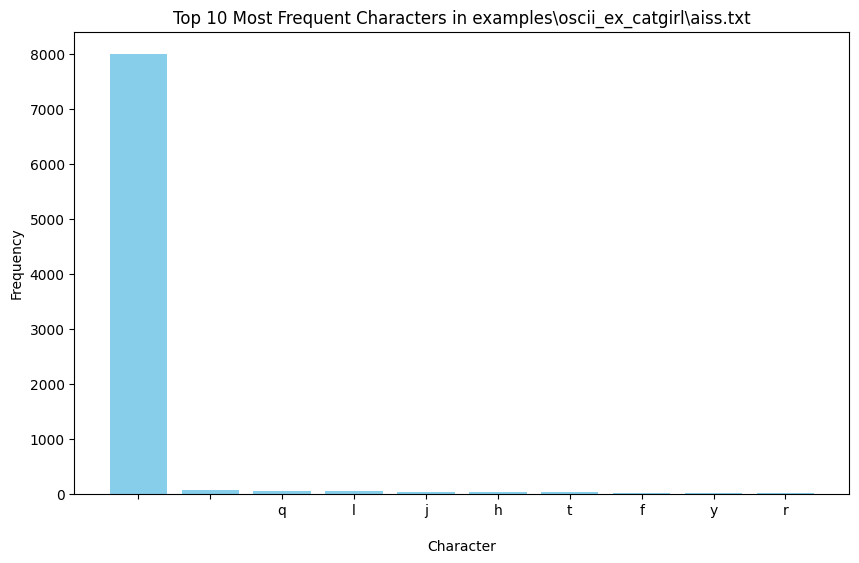

Processing examples\oscii_ex_catgirl\nn.txt...


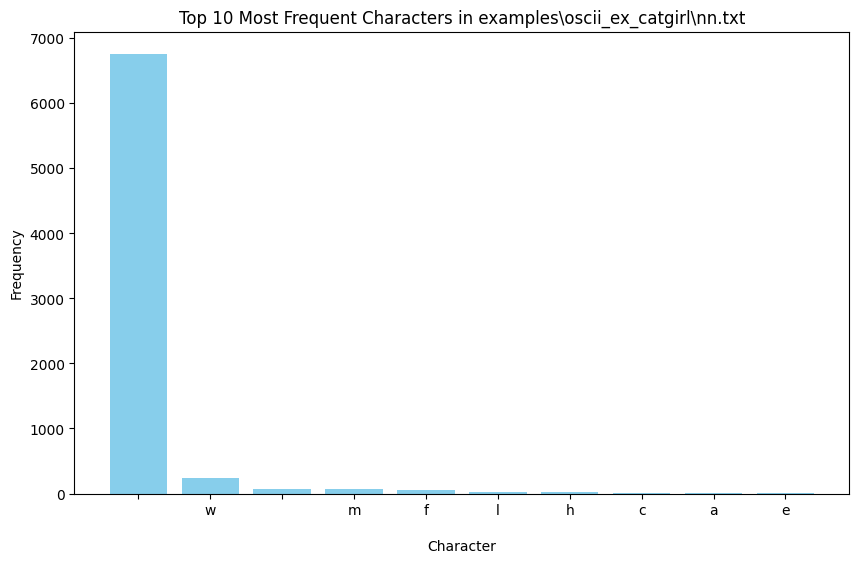

Processing examples\oscii_ex_catgirl\knn.txt...


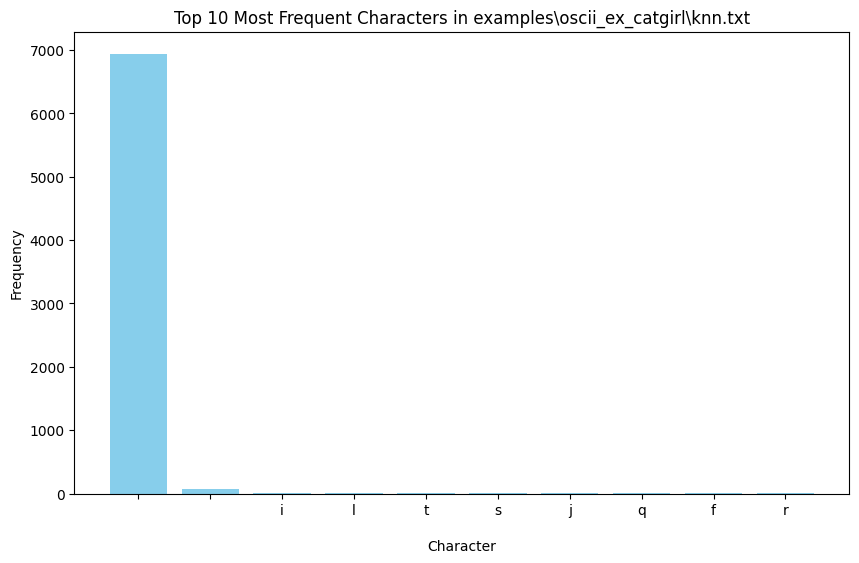

Processing examples\oscii_ex_catgirl\svm.txt...


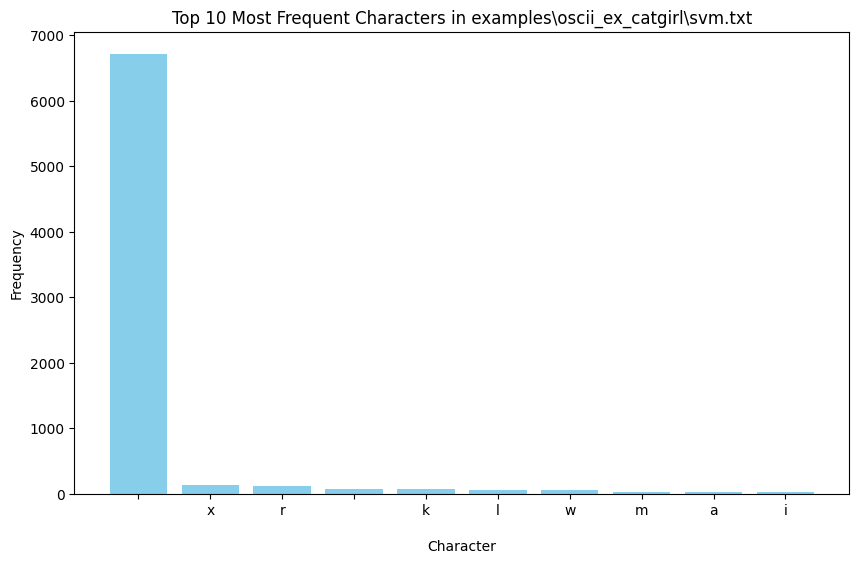

Processing examples\oscii_ex_catgirl\rforest.txt...


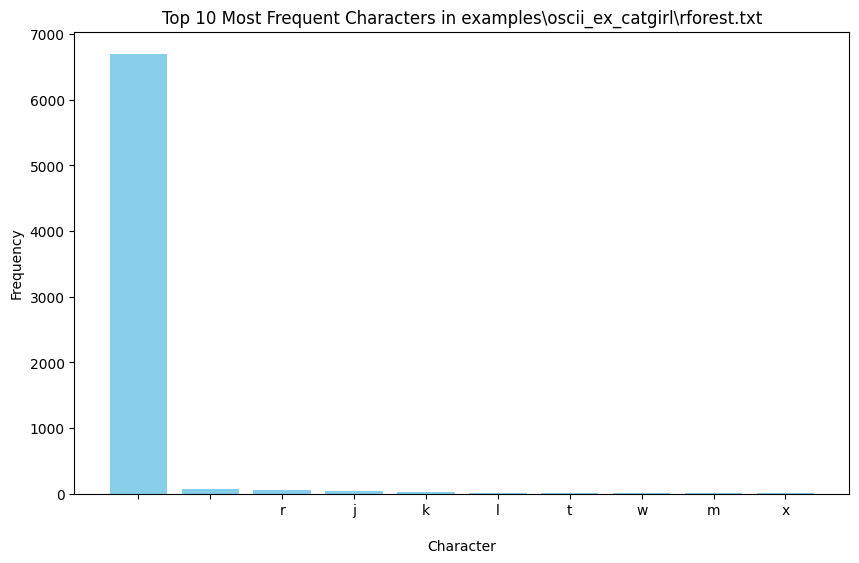

Processing examples\oscii_ex_catgirl\cnn.txt...


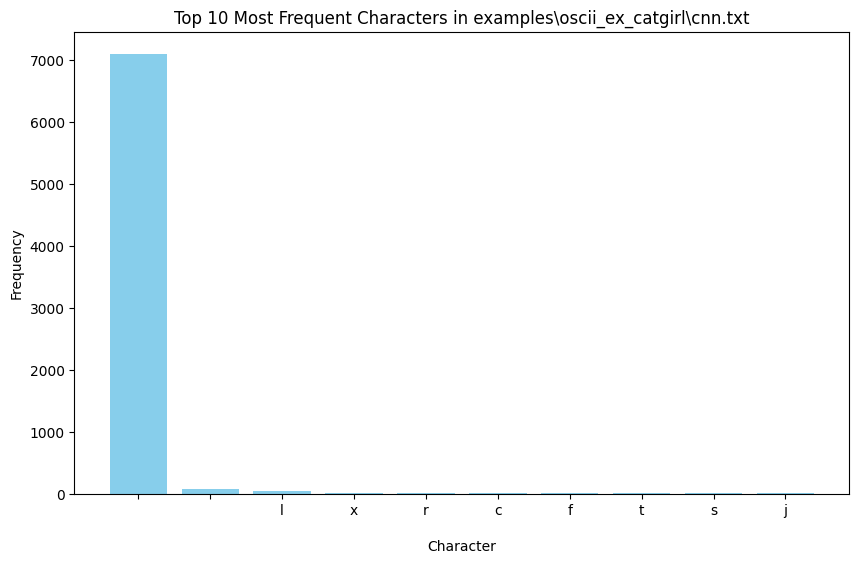

Processing examples\oscii_ex_catgirl\resnet.txt...


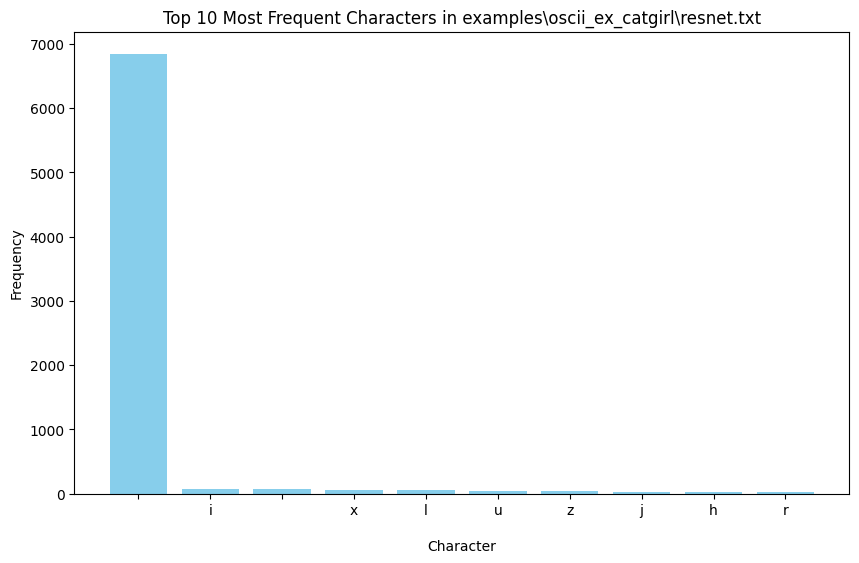

Processing examples\oscii_ex_catgirl\mobile.txt...


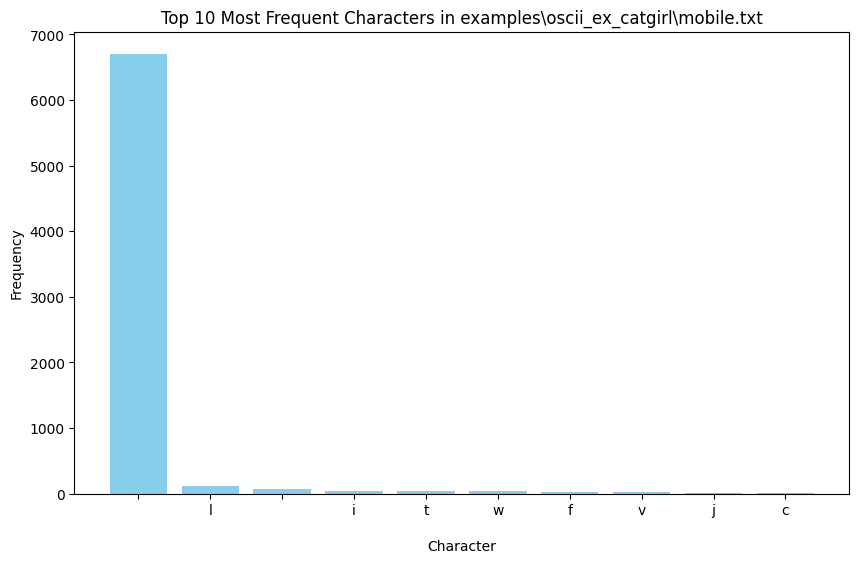

In [3]:
image_filenames = ['examples\oscii_ex_catgirl\\aiss.txt', 'examples\oscii_ex_catgirl\\nn.txt',
    'examples\oscii_ex_catgirl\knn.txt', 'examples\oscii_ex_catgirl\svm.txt', 'examples\oscii_ex_catgirl\\rforest.txt', 
     'examples\oscii_ex_catgirl\cnn.txt', 'examples\oscii_ex_catgirl\\resnet.txt', 'examples\oscii_ex_catgirl\mobile.txt'
     ] 

space_counts = process_files_from_array(image_filenames)

In [4]:
perform_anova(space_counts)

ANOVA Test Result: F-statistic = nan, p-value = nan
The difference in space counts is not statistically significant.


c:\Users\Sai\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:567: SmallSampleWarning: all input arrays have length 1.  f_oneway requires that at least one input has length greater than 1.
  if is_too_small(samples, kwds):
C:\Users\Sai\AppData\Local\Temp\ipykernel_2872\3855924477.py:46: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  f_statistic, p_value = stats.f_oneway(*space_counts)
